# Given two questions predict if it is a duplicate or not

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
raw_data = pd.read_csv("./data/train.csv",index_col=0)

In [3]:
raw_data.sample(3)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
386157,179497,213763,What are some tips on making it through the jo...,What are some tips on making it through the jo...,0
36587,66693,66694,How much do CrossFit gym owners make?,How many people are Crossfitting either at an ...,0
2343,4659,4660,How is an intelligence quotient test preformed...,How is an intelligence quotient test preformed...,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404290 entries, 0 to 404289
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          404290 non-null  int64 
 1   qid2          404290 non-null  int64 
 2   question1     404289 non-null  object
 3   question2     404288 non-null  object
 4   is_duplicate  404290 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.5+ MB


**We see there are few null values in the data**
- `question1` and `question2` have null values

In [7]:
raw_data["is_duplicate"].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

**we see there are few missclassifications in the data**
-  looks lika a `binary classification problem`

### Check missing values

In [6]:
raw_data.isnull().sum()

qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

### Treat Missing Values

In [9]:
raw_data.dropna(inplace=True)

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          404287 non-null  int64 
 1   qid2          404287 non-null  int64 
 2   question1     404287 non-null  object
 3   question2     404287 non-null  object
 4   is_duplicate  404287 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.5+ MB


### Check duplicates

In [11]:
raw_data.duplicated().sum()

0

**There are no duplicate rows in the data**

### Distribution of target

In [12]:
# no.of duplicate and non-duplicate questions
raw_data["is_duplicate"].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [13]:
# proportionof duplicate and non-duplicate questions
raw_data["is_duplicate"].value_counts(normalize=True)

0    0.630799
1    0.369201
Name: is_duplicate, dtype: float64

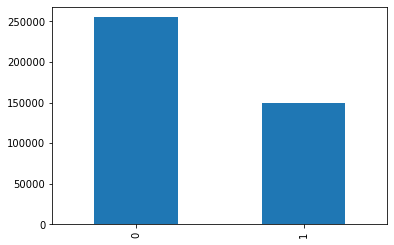

In [14]:
raw_data["is_duplicate"].value_counts().plot(kind="bar")
plt.show()

> Data is imbalanced. There are more samples for 0 (i.e..non_duplicated) questions.

### Unique Questions

In [21]:
joined_qids = pd.Series(raw_data["qid1"].tolist() + raw_data["qid2"].tolist())

In [22]:
print("Number of unique questions :", np.unique(joined_qids).shape[0])

Number of unique questions : 537929


### Most duplicated questions

In [26]:
joined_qids.value_counts().sort_values()

302833      1
275326      1
275327      1
275330      1
275333      1
         ... 
14376      79
2561       88
4044      111
30782     120
2559      157
Length: 537929, dtype: int64

<AxesSubplot:ylabel='Frequency'>

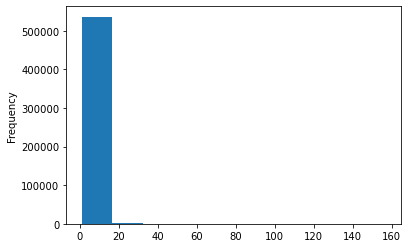

In [25]:
joined_qids.value_counts().plot(kind="hist")

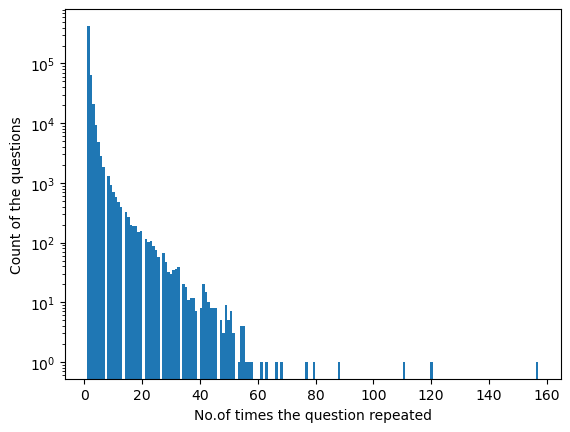

In [20]:
plt.hist(qid.value_counts().values, bins=180)
plt.yscale("log")
plt.xlabel("No.of times the question repeated")
plt.ylabel("Count of the questions")
plt.show()

**In this graph we can look into questions occuring no of times**
- questions occurring only once are around 5 lakhs
- as we move forward as the num of ques repeated are increasing the no .of questions that are repeated are decreased
- there is one question in the data which is repeated 160 times

In [21]:
qid.value_counts().shape

(537933,)

### Feature Engineering

In [22]:
raw_data

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,537928,537929,What is one coin?,What's this coin?,0


In [23]:
# feature new col taking the len of q1 and q2
raw_data["q1_len"]= raw_data["question1"].str.len()
raw_data["q2_len"]= raw_data["question2"].str.len()

In [24]:
raw_data.head()

,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
id,,,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0


In [34]:
#feature new col taking no of words in q1 and q2
raw_data["q1_num_words"] = raw_data['question1'].apply(lambda row: len(str(row).split()))
raw_data["q2_num_words"] = raw_data['question2'].apply(lambda row: len(str(row).split()))

In [36]:
raw_data

,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
id,,,,,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,14,12
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8,13
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14,10
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,11,9
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13,7
...,...,...,...,...,...,...,...,...,...
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85.0,79.0,14,13
404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,41.0,42.0,8,9
404287,537928,537929,What is one coin?,What's this coin?,0,17.0,17.0,4,3
